In [1]:
#importing all the libraries and csv file
from pandas import *
from numpy.random import *
from numpy import *
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df= read_csv('DataWarehouse.csv',engine='python')

In [2]:
# the lowest priced restaurants that are not rated
mean_lowest_price = df[df['Price range']== 1]['Aggregate rating'].replace(0.0, nan).mean()
print(f"Mean of aggregate rating with price range 1: {mean_lowest_price}")

Mean of aggregate rating with price range 1: 3.334984844952209


In [3]:
# filling with their average
df[df['Price range']== 1]['Aggregate rating'].replace(0.0,nan, inplace=True)
df['Aggregate rating'].replace(nan, mean_lowest_price, inplace=True)

In [4]:
#Next the lower priced restaurants that are not rated
mean_lower_price = df[df['Price range']== 2]['Aggregate rating'].replace(0, nan).mean()
print(f"Mean of aggregate rating with price range 2: {mean_lowest_price}")

Mean of aggregate rating with price range 2: 3.334984844952209


In [5]:
# filling with their average
df['Aggregate rating'].replace(0, mean_lower_price, inplace=True)

3.6490085496296096


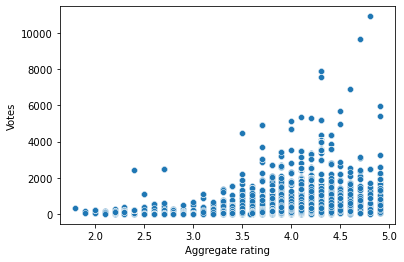

In [6]:
#Checking
print(df['Aggregate rating'].mean())

#Checking the new scatterplot, no restaurant has a rating of 0 now.
sns.scatterplot(x='Aggregate rating',y='Votes',data=df)
y=df["Rating text"]

#As an aggregate rating of 2.5-3.5 translates to a rating of "Average", the "Not Rated"
#text can be replaced with "Average" in the dependent variable.

y.replace('Not rated','Average', inplace=True)

In [7]:
#As we know, the 'Rating Text' and 'Rating Color' is given as a string. 
#This needs to be encoded into numeric data so that the algorithm can perform calculations.
#This can be done easily using the LabelEncoder tool from sklearn.

from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
df["Rating text"]=labelEncoder_X.fit_transform(df["Rating text"])
#Shows that excellent = 1, very good = 4, good = 2, average = 0, and assuming poor = 3.
print(df["Rating text"].unique())
df["Rating color"]=labelEncoder_X.fit_transform(df["Rating color"])

[1 4 2 0 3]


In [8]:
for index, row in df.iterrows():
    try:
        l=row["Cuisines"].split(", ")
    except:
        continue
    
    for i in l:
        if i not in df.columns:
            df.loc[index,i]=1
            df[i].replace(nan, 0, inplace=True)
        df.loc[index,i]=1

df.drop(["Cuisines"],axis=1,inplace=True)

In [9]:
df.describe()

,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Rating color,Rating text,Votes,French,Japanese,...,Kebab,Turkish Pizza,Izgara,World Cuisine,Dí_ner,Restaurant Cafe,Bí_rek,Döner,Börek,Fresh Fish
count,39304.000000,39304.000000,39304.000000,39304.000000,39304.000000,39304.000000,39304.000000,39304.000000,39304.000000,39304.000000,...,39304.000000,39304.000000,39304.000000,39304.000000,39304.000000,39304.000000,39304.000000,39304.000000,39304.000000,39304.000000
mean,63.626996,20.752542,2217.672756,2.091441,3.649009,4.626883,1.597369,433.745369,0.006386,0.020456,...,0.000509,0.000407,0.000127,0.000229,0.000025,0.000204,0.000025,0.000051,0.000025,0.000025
std,62.813259,21.347402,17750.203378,0.956545,0.544524,4.060458,1.602619,866.327163,0.079659,0.141556,...,0.022552,0.020172,0.011278,0.015131,0.005044,0.014266,0.005044,0.007133,0.005044,0.005044
min,-157.948486,-41.330428,0.000000,1.000000,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,77.085958,26.852810,120.000000,1.000000,3.300000,1.000000,0.000000,14.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,77.218187,28.568446,450.000000,2.000000,3.600000,3.000000,2.000000,69.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,77.333096,28.642216,800.000000,3.000000,4.100000,8.000000,3.000000,351.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,174.832089,73.990000,800000.000000,4.000000,4.900000,13.000000,4.000000,10934.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df['Latitude'].isnull().unique()

array([False])

In [11]:
df['Longitude'].isnull().unique()

array([False])

In [12]:
df["Has Online delivery"].replace(["Yes","No"],[1,0],inplace=True)
df["Is delivering now"].replace(["Yes","No"],[1,0],inplace=True)
df["Has Table booking"].replace(["Yes","No"],[1,0],inplace=True)
df['Switch to order menu'].replace(["Yes","No"],[1,0],inplace=True)

In [13]:
df = df.drop(['Restaurant Name',"Locality",'Country','City','Address','Currency',"Rating color",'Aggregate rating'], axis=1)

In [14]:
df.head()

,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Rating text,Votes,...,Kebab,Turkish Pizza,Izgara,World Cuisine,Dí_ner,Restaurant Cafe,Bí_rek,Döner,Börek,Fresh Fish
0,121.027535,14.565443,1100,1,0,0,0,3,1,314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,121.014101,14.553708,1200,1,0,0,0,3,1,591,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,121.056831,14.581404,4000,1,0,0,0,4,4,270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,121.056475,14.585318,1500,0,0,0,0,4,1,365,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,121.057508,14.584450,1500,1,0,0,0,4,1,229,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df.to_csv('CleanedData.csv',index=False)